# Foundations of Data Science
## Homework 5 

Student Name: Vaishali Pari

Student Netid: vp1096
***

### Part 1: Critique this plan (8 points)
1\. After a few beers your CIO invited his buddy from Green Berry consulting to propose a project using data mining to improve the targeting of the new service that you have been a principal in developing. The service has been quite successful so far, being marketed over the last 6 months via your ingenious, and very inexpensive, word-of-mouth campaign. You've already garnered a pretty large customer base without any targeting, and you've been seeing this success as your best stepping stone to bigger and better things in the firm. 

After some reflection, you've decided that your best course of action is to play a key role in ensuring the success of this data mining project as well. You agree with your CIO's statement in a meeting with Green Berry, that accurate targeting might cost-effectively expand your audience substantially to consumers that word-of-mouth would not reach. You accept that what Green Berry says about the characteristics of your service is accurate.

Based on what we have covered in class, identify the four most serious weaknesses/flaws in this abridged version of Green Berry's proposal, and suggest how to ameliorate them.  Your answer should be 4 bullet points, each comprising 2-4 sentences: 1-2 sentences stating each weakness, and 1-2 sentences suggesting a better alternative.  Maximal credit will be given when the 4 points are as independent as possible.


```
--- -------------------------------------------------------------------------- ---
                            Targeted Audience Expansion             
                      Prepared by Green Berry Consulting, Inc.

Your problem is to expand the audience of your new service.  We (Green Berry) have a 
large database of consumers who can be targeted.  We will build a predictive model 
to estimate which of these consumers are the most likely to adopt the product, and
then target them with the special offer you have designed.

More specifically, we will build a logistic regression (LR) model to predict adop-
tion of the service by a consumer, based on the data on your current customers of 
this service.  The model will be based on their demographics and their usage of 
the service. We believe that logistic regression is the best choice of method be-
cause it is a tried-and-true statistical modeling technique, and we can easily 
interpret the coefficients of the model to infer whether the attributes are stat-
istically significant, and whether they make sense. If they are statistically sig-
nificant and they do make sense, then we can have confidence that the model will 
be accurate in predicting service uptake. We will apply the model to our large 
database of consumers, and select out those who have not yet subscribed and whom
the LR model predicts to be the most likely to subscribe.  To these we will send 
the targeted offer. As this is a fixed-profit-per-customer service, this also 
will in effect rank them by expected profit.
--- -------------------------------------------------------------------------- ---
```

- Green berry has a large database of consumers who can be targeted. we do not know the source of the data and if the data is relevent to this product. 
- we do not know if LR model is going to give us the best prediction accuracy. They have not mentioned any comparison reason for choosing it. we can try Svm and compare with it. 
- Based on the coefficient of the model they infer statistical significance of the attributes, if they make sence then the model will be accurate in predicting service uptake. This is more of an assumption they are making than any statistical test on the data to come to a conclusion.
- once the offers are sent to the targeted consumers, they also rank them by expected profit. It could be a fixed-profit-per-customer service but as we achieve a specific target we can alwayays increase the profit. Not necessary the prediction should have a correlation with profit.

### Part 2: Sentiment analysis (12 points)

In this assignment we will be looking at a directed, signed network regarding Wikipedia editors who want to become an administrator. In order for this to happen, a request for adminship (RfA) is submitted, either by the candidate or by another community member. Subsequently, any Wikipedia member may cast a supporting, neutral, or opposing vote.

The dataset and further description can be found here:
https://snap.stanford.edu/data/wiki-RfA.html

In sum, nodes represent Wikipedia members and edges represent votes. Each entry in the dataset also includes text of a comment associated with the vote.



1\. Convert the data into a pandas `DataFrame()`, which will have one column for each of the data attributes, SRC, TGT, etc. (3 points) 

In [3]:
import pandas as pd
import numpy as np
array={"SRC":list(), "TGT":list(), "VOT":list(), "RES":list(), "YEA":list(), "DAT":list(), "TXT":list()}
for line in open('rfa_all.NL-SEPARATED.txt').read().split('\n\n'):
    for x in line.split('\n'):
        array[x[:3]].append(x[4:])
df=pd.DataFrame.from_dict(array) 
df

,DAT,RES,SRC,TGT,TXT,VOT,YEA
0,"23:13, 19 April 2013",1,Steel1943,BDD,'''Support''' as co-nom.,1,2013
1,"01:04, 20 April 2013",1,Cuchullain,BDD,'''Support''' as nominator.--,1,2013
2,"23:43, 19 April 2013",1,INeverCry,BDD,'''Support''' per noms.,1,2013
3,"00:11, 20 April 2013",1,Cncmaster,BDD,'''Support''' per noms. BDD is a strong contri...,1,2013
4,"00:56, 20 April 2013",1,Miniapolis,BDD,"'''Support''', with great pleasure. I work wit...",1,2013
5,"01:53, 20 April 2013",1,Sven Manguard,BDD,'''Support''' There are plenty of important ro...,1,2013
6,"02:00, 20 April 2013",1,Ramaksoud2000,BDD,'''Support''' per noms. I don't see a reason n...,1,2013
7,"02:18, 20 April 2013",1,RockMagnetist,BDD,'''Support''' BDD already wields a broom pret...,1,2013
8,"02:22, 20 April 2013",1,Carrite,BDD,'''Support''' barring a completely unexpected ...,1,2013
9,"03:09, 20 April 2013",1,Someguy1221,BDD,'''Support''' because I see no good reason not...,1,2013


2\. Using the VOT column as the target variable, code the values as -1 or 0  as '0' and 1 to stay as '1'. (1 point)


In [4]:
df['VOT']=np.where(df['VOT']=='1','1','0')
df

,DAT,RES,SRC,TGT,TXT,VOT,YEA
0,"23:13, 19 April 2013",1,Steel1943,BDD,'''Support''' as co-nom.,1,2013
1,"01:04, 20 April 2013",1,Cuchullain,BDD,'''Support''' as nominator.--,1,2013
2,"23:43, 19 April 2013",1,INeverCry,BDD,'''Support''' per noms.,1,2013
3,"00:11, 20 April 2013",1,Cncmaster,BDD,'''Support''' per noms. BDD is a strong contri...,1,2013
4,"00:56, 20 April 2013",1,Miniapolis,BDD,"'''Support''', with great pleasure. I work wit...",1,2013
5,"01:53, 20 April 2013",1,Sven Manguard,BDD,'''Support''' There are plenty of important ro...,1,2013
6,"02:00, 20 April 2013",1,Ramaksoud2000,BDD,'''Support''' per noms. I don't see a reason n...,1,2013
7,"02:18, 20 April 2013",1,RockMagnetist,BDD,'''Support''' BDD already wields a broom pret...,1,2013
8,"02:22, 20 April 2013",1,Carrite,BDD,'''Support''' barring a completely unexpected ...,1,2013
9,"03:09, 20 April 2013",1,Someguy1221,BDD,'''Support''' because I see no good reason not...,1,2013


3\. Put all of the text (TXT column) into a data frame called `X` and the target variable in a data frame called `Y`. Make a train/test split where you give 75% of the data to training. (2 points)

In [3]:
from sklearn.model_selection import train_test_split
x=pd.DataFrame(df['TXT'])
y=pd.DataFrame(df['VOT'].astype(int))
X_train, X_test, Y_train, Y_test = train_test_split(x, y, train_size=.75)

4\. Create a binary `CountVectorizer()` and `TfidfVectorizer()`. Use the original single words as well as bigrams. Also, use an "english" stop word list. Fit these to the training data to extract a vocabulary and then transform both the train and test data. (3 points)

In [4]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

binary_vectorizer = CountVectorizer(ngram_range=(2,2), analyzer='word',stop_words='english')
binary_vectorizer.fit(X_train.TXT)
X_train_binary = binary_vectorizer.transform(X_train.TXT)
X_test_binary = binary_vectorizer.transform(X_test.TXT)

tfidf_vectorizer = TfidfVectorizer()
tfidf_vectorizer.fit(X_train.TXT)
X_train_tfidf = tfidf_vectorizer.transform(X_train.TXT)
X_test_tfidf = tfidf_vectorizer.transform(X_test.TXT)

5\. Create `LogisticRegression()` and `BernoulliNB()` models. For all settings, keep the default values. In a single plot, show the AUC curve for both classifiers and both the binary and tfidf feature sets. In the legend, include the area under the ROC curve (AUC). Do not forget to label your axes. Your final plot will be a single window with 4 curves.

Which model do you think does a better job? Why? Explain in no more than a paragraph. (3 points)

/Users/vaishalipari/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


ROC score for LR model and count vectorizor = 0.967
ROC score for LR model and tfidf vectorizor = 0.990
ROC score for BernoulliNB model and Count vectorizor = 0.921
ROC score for BernoulliNB model and tfidf vectorizor = 0.868


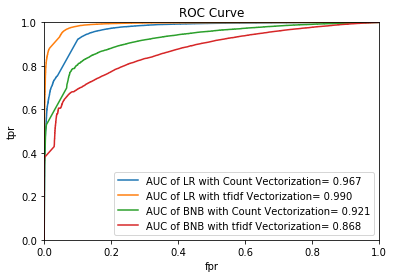

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn import metrics
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

model = LogisticRegression()
model.fit(X_train_binary, Y_train)
pred=model.predict_proba(X_test_binary)[:,1]
roc=metrics.roc_auc_score(Y_test.VOT,pred)
print("ROC score for LR model and count vectorizor = %.3f" % roc)
fpr, tpr, thresholds = metrics.roc_curve(Y_test, pred)
ax = plt.subplot()
plt.plot(fpr, tpr,label='AUC of LR with Count Vectorization= %0.3f' % roc)

model = LogisticRegression()
model.fit(X_train_tfidf, Y_train)
pred=model.predict_proba(X_test_tfidf)[:,1]
roc=metrics.roc_auc_score(Y_test.VOT,pred)
fpr, tpr, thresholds = metrics.roc_curve(Y_test, pred)
plt.plot(fpr, tpr, label='AUC of LR with tfidf Vectorization= %0.3f' % roc)
print("ROC score for LR model and tfidf vectorizor = %.3f" % metrics.roc_auc_score(Y_test.VOT,pred))

model = BernoulliNB()
model.fit(X_train_binary, Y_train)
pred=model.predict_proba(X_test_binary)[:,1]
roc=metrics.roc_auc_score(Y_test.VOT,pred)
fpr, tpr, thresholds = metrics.roc_curve(Y_test, pred)
plt.plot(fpr, tpr, label='AUC of BNB with Count Vectorization= %0.3f' % roc)
print("ROC score for BernoulliNB model and Count vectorizor = %.3f" % metrics.roc_auc_score(Y_test.VOT,pred))

model = BernoulliNB()
model.fit(X_train_tfidf, Y_train)
pred=model.predict_proba(X_test_tfidf)[:,1]
roc=metrics.roc_auc_score(Y_test.VOT,pred)
fpr, tpr, thresholds = metrics.roc_curve(Y_test, pred)
plt.plot(fpr, tpr, label='AUC of BNB with tfidf Vectorization= %0.3f' % roc)
print("ROC score for BernoulliNB model and tfidf vectorizor = %.3f" % metrics.roc_auc_score(Y_test.VOT,pred))

plt.xlabel("fpr")
plt.ylabel("tpr")
plt.title("ROC Curve")
plt.legend(loc='lower right')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.show()

The Logistic Regession model does a better job than BernoullinNB model in case of both the Count vectorization and tfidf vectorization. We can say this by looking at the above graph and the auc score from the roc curve.

### Part 3: Network analysis and visualization (10 points)

In this part of the assignment we will analyze basic characteristics of the same Wikipedia network used in Part 2.


1. Prepare an edgefile for importing. First, map the node names to integer values. For data values, let's just start with the VOT column value. (2 points)

In [5]:
import networkx as nx
edge=df[['SRC', 'TGT', 'VOT']].copy()
edge['SRC']=pd.factorize(edge['SRC'])[0]
edge['TGT']=pd.factorize(edge['TGT'])[0]
edge['VOT']=edge['VOT'].astype(int)
edge.to_csv('edge.csv',header=False, index= False)

2\. Now load the data as a graph object called 'Gwik'. (1 point)

In [16]:
Gwik = nx.read_edgelist("edge.csv",delimiter=',',data=(("VOT",int),))
Gwik.edges(data=True)

[(u'5988', u'1270', {'VOT': 1}),
 (u'5988', u'1354', {'VOT': 0}),
 (u'5988', u'1537', {'VOT': 1}),
 (u'5988', u'1582', {'VOT': 1}),
 (u'5988', u'1476', {'VOT': 1}),
 (u'5988', u'1912', {'VOT': 0}),
 (u'5989', u'1270', {'VOT': 1}),
 (u'5989', u'1520', {'VOT': 1}),
 (u'5982', u'1268', {'VOT': 1}),
 (u'5982', u'1312', {'VOT': 1}),
 (u'5982', u'1303', {'VOT': 1}),
 (u'5982', u'1730', {'VOT': 0}),
 (u'5982', u'695', {'VOT': 0}),
 (u'5982', u'1150', {'VOT': 0}),
 (u'5982', u'1520', {'VOT': 1}),
 (u'5982', u'1690', {'VOT': 1}),
 (u'5982', u'1811', {'VOT': 1}),
 (u'5983', u'1807', {'VOT': 0}),
 (u'5983', u'1568', {'VOT': 1}),
 (u'5983', u'1268', {'VOT': 1}),
 (u'5983', u'1834', {'VOT': 0}),
 (u'5983', u'1366', {'VOT': 1}),
 (u'5983', u'1299', {'VOT': 1}),
 (u'5983', u'1478', {'VOT': 1}),
 (u'5980', u'1322', {'VOT': 1}),
 (u'5980', u'1268', {'VOT': 1}),
 (u'5980', u'2455', {'VOT': 0}),
 (u'5980', u'2432', {'VOT': 1}),
 (u'5980', u'2090', {'VOT': 1}),
 (u'5980', u'2099', {'VOT': 1}),
 (u'5980', 

3\. Confirm the number of nodes and edges in the graph object. (2 points)

In [8]:
print('No of edges = %d' % len(Gwik.edges()))
print('No of nodes = %d' % len(Gwik.nodes()))

No of edges = 187860
No of nodes = 10438


4\. Compute the degree, betweneess and closeness centrality measures for the graph. Are all 3 meaningful here given what you know about the nodes and edges? (2 points)

In [13]:
degree=nx.degree_centrality(Gwik)
degree

{u'3480': 0.006898534061511929,
 u'5988': 0.0005748778384593274,
 u'5989': 0.00019162594615310913,
 u'5982': 0.0008623167576889911,
 u'5983': 0.0006706908115358819,
 u'5980': 0.0026827632461435278,
 u'5981': 9.581297307655457e-05,
 u'5986': 0.0029702021653731916,
 u'5987': 9.581297307655457e-05,
 u'5984': 9.581297307655457e-05,
 u'5985': 9.581297307655457e-05,
 u'6487': 9.581297307655457e-05,
 u'6970': 9.581297307655457e-05,
 u'6796': 0.0012455686499952094,
 u'6797': 0.004024144869215292,
 u'6794': 0.0005748778384593274,
 u'6795': 0.001533007569224873,
 u'6792': 9.581297307655457e-05,
 u'6793': 0.00019162594615310913,
 u'6790': 9.581297307655457e-05,
 u'6791': 0.010539427038421003,
 u'6798': 0.00019162594615310913,
 u'6799': 0.0018204464884545367,
 u'2147': 0.01197662163456932,
 u'270': 0.014851010826865957,
 u'271': 0.018396090830698476,
 u'272': 0.012455686499952094,
 u'273': 0.007185972980741593,
 u'274': 0.07176391683433937,
 u'275': 0.014371945961483185,
 u'276': 0.011401743796109

In [ ]:
closeness=nx.closeness_centrality(Gwik)
list(closeness)[0:5]

In [ ]:
betweenness=nx.edge_betweenness_centrality(Gwik)
list(betweenness)[0:5]

5\. Now visualize the graph. How do you visualize the edges to communicate vote values? (1 point)

In [ ]:
nx.draw(Gwik, with_labels=True)
plt.show()

6\. Now also add in the resolution of the vote into your graph, and a new visualization of the network. Explain your choice of how to visually show this new information? (2 points)

In [ ]:
plt.figure(figsize=(18,18))

Gwik = nx.gnm_random_graph(300,200)
graph_pos = nx.spring_layout(Gwik)
nx.draw_networkx_nodes(Gwik, graph_pos, node_size=10, node_color='blue', alpha=0.3)
nx.draw_networkx_edges(Gwik, graph_pos)
nx.draw_networkx_labels(Gwik, graph_pos, font_size=8, font_family='sans-serif')

plt.show()